In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

Splitting files 0.2 test 0.8 train ( 0.2 validation 0.8 train) so in aggregate 0.2 test 0.16 val 0.64 train

In [150]:
df = pd.read_csv("data.csv")

x = df.drop(columns="sl")
y = df["sl"].copy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

df_train = pd.concat([x_train,y_train], axis=1).dropna()
df_val = pd.concat([x_val,y_val],axis=1).dropna()
df_test = pd.concat([x_test,y_test],axis=1).dropna()

bois = [df_train,df_val,df_test]

In [151]:
print(df_train.head())
print(df_val.head())
print(df_test.head())

        sr      rr       t      lm      bo    rem   sr.1     hr  sl
232  57.44  19.488  95.488   9.488  94.232  83.72  6.488  58.72   1
170  59.60  19.920  95.920   9.920  94.880  84.80  6.920  59.80   1
135  48.56  17.424  98.136   6.848  96.424  74.24  8.424  53.56   0
310  85.04  23.344  90.672  13.680  88.672  96.68  0.672  68.36   3
212  45.48  16.192  96.288   4.384  95.192  61.92  7.192  50.48   0
         sr      rr       t      lm      bo     rem   sr.1     hr  sl
339  89.120  24.432  91.216  15.040  89.216   98.04  1.216  71.08   3
411  97.856  27.856  87.320  17.928  84.784  102.32  0.000  79.64   4
288  88.280  24.208  91.104  14.760  89.104   97.76  1.104  70.52   3
200  46.360  16.544  96.816   5.088  95.544   65.44  7.544  51.36   0
142  78.400  21.840  93.840  11.840  91.840   94.20  4.760  64.60   2
        sr      rr       t      lm      bo    rem   sr.1     hr  sl
600  93.56  25.616  91.808  16.520  89.808  99.52  1.808  74.04   3
561  49.48  17.792  98.688   7.584  

Empty DataFrame
Columns: [sr, rr, t, lm, bo, rem, sr.1, hr, sl]
Index: []
Empty DataFrame
Columns: [sr, rr, t, lm, bo, rem, sr.1, hr, sl]
Index: []
Empty DataFrame
Columns: [sr, rr, t, lm, bo, rem, sr.1, hr, sl]
Index: []
sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64
sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64
sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64


<AxesSubplot:>

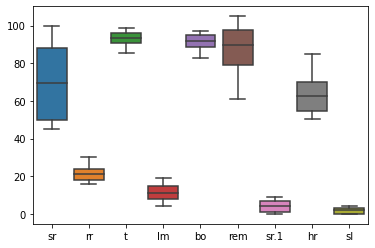

In [152]:
for elements in bois:
  print(elements[elements.duplicated()])

for df in bois:
  print(df.isnull().sum())

sns.boxplot(data=df)

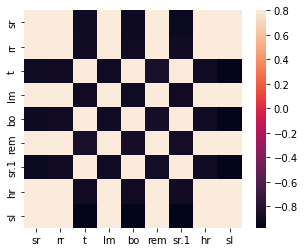

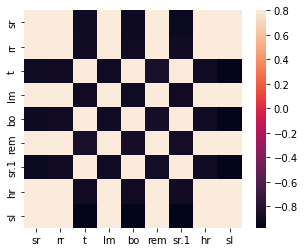

In [153]:
corr = (df.corr())
f, ax = plt.subplots(figsize=(5,4))
display((sns.heatmap(corr, vmax=.8, square=True)).figure)

In [154]:
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(x_train.values, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [155]:
y_pred_baseline = model.predict(x_val.values)

In [156]:
print(accuracy_score(y_pred_baseline, y_val))
print(y_pred_baseline[1])

print(precision_score(y_pred_baseline, y_val, average="micro"))
print(recall_score(y_pred_baseline, y_val, average="micro"))
print(f1_score(y_pred_baseline, y_val, average="micro"))
print(confusion_matrix(y_pred_baseline, y_val))

1.0
4
1.0
1.0
1.0
[[18  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 18]]


In [157]:
# print(len(x_val))
# x_val = x_val.append([[93.8,25.68,91.84,16.6,89.84,99.6,1.84,74.2]])
print(x_val)
print(y_pred_baseline)
print("PREDICTION : "+str(model.predict([[93.8,25.68,91.84,16.6,89.84,99.6,1.84,74.2]])))

         sr      rr       t      lm      bo     rem   sr.1     hr
339  89.120  24.432  91.216  15.040  89.216   98.04  1.216  71.08
411  97.856  27.856  87.320  17.928  84.784  102.32  0.000  79.64
288  88.280  24.208  91.104  14.760  89.104   97.76  1.104  70.52
200  46.360  16.544  96.816   5.088  95.544   65.44  7.544  51.36
142  78.400  21.840  93.840  11.840  91.840   94.20  4.760  64.60
..      ...     ...     ...     ...     ...     ...    ...    ...
385  47.320  16.928  97.392   5.856  95.928   69.28  7.928  52.32
420  52.160  18.432  94.432   8.432  92.648   81.08  5.432  56.08
55   75.680  21.568  93.568  11.568  91.568   92.84  4.352  63.92
448  66.240  20.624  92.624  10.624  90.624   88.12  2.936  61.56
400  80.360  22.096  90.048  12.120  88.048   95.12  0.048  65.24

[101 rows x 8 columns]
[3 4 3 0 2 3 4 4 2 4 4 0 3 3 0 1 0 4 1 3 2 1 2 1 3 2 2 0 2 3 4 2 1 4 2 3 1
 1 4 3 4 2 4 1 1 4 0 1 3 0 2 2 0 3 3 2 0 2 0 3 3 3 1 3 0 4 2 4 4 1 1 3 3 1
 1 0 3 0 2 1 0 1 0 2 2 4 2 3 4 4 2

In [163]:
data_input = [[99.904,29.904,89.88,18.952,87.856,104.88,0,84.76]]
# print(data_input)
print(model.predict(data_input))

[4]
